In [136]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [137]:
from utils import plot_wigner

### Coherent States

In [138]:
# alphas = [1, 0.5+0.5j, 1j, 1+1j]
# x = np.linspace(-4, 4, 1_000)
# y = np.linspace(-4, 4, 1_000)

# fig, axs = plt.subplots(1, len(alphas), figsize=[7*len(alphas), 5])
# for alpha, ax in zip(alphas, axs):
#     plot_wigner(coherent(N, alpha), x, y, ax=ax, cmap='inferno')

### Constants

In [139]:
N = 3
r = 1/20 # k1/k2
k1 = 1

### QHO Operators

In [140]:
a = create(N)
adag = destroy(N)

### Operators for Dynamics
Natural units so set $\hbar = 1$

In [141]:
gain = k1 * lindblad_dissipator(adag)
loss = r/k1 * lindblad_dissipator(a**2)

## Steady State
For time-independent open quantum systems with decay rates larger than the corresponding excitation rates, the system will tend toward a steady state

### Interaction picture $\hat H=0$ with no signal

In [142]:
H0 = Qobj(np.zeros([N, N]))
sstate = steadystate(H0, [gain, loss])
sstate

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.86956522 0.         0.        ]
 [0.         0.08695652 0.        ]
 [0.         0.         0.04347826]]

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1500c2e30a0>)

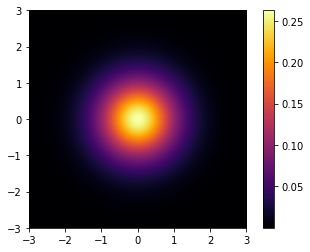

In [143]:
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
plot_wigner(sstate, x, y, cmap='inferno')

In [144]:
detuning = 0
drive_strength = k1
H_drive = detuning * adag*a + 0.5*drive_strength * (a + adag)

drive_sstate = steadystate(H_drive, [gain, loss])
drive_sstate

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 0.48630224+0.j          0.        +0.32736088j -0.14409445+0.j        ]
 [ 0.        -0.32736088j  0.37599111+0.j          0.        +0.16035985j]
 [-0.14409445+0.j          0.        -0.16035985j  0.13770665+0.j        ]]

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1500c37c4f0>)

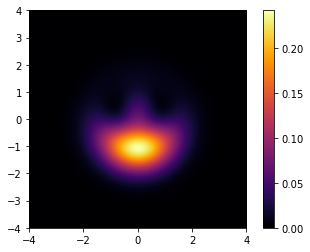

In [145]:
x = np.linspace(-4,4,100)
y = np.linspace(-4,4,100)
plot_wigner(drive_sstate, x, y, cmap='inferno')